# Como construir o fractal de mendelbrot usando Python

Nesse tutorial vamos entender como desenhar um fractal muito famoso no mundo da computação: o fractal de mendelbrot. Para isso vamos reaproveitar alguns códigos criados para mostrar um canvas. 

Portanto, aqui vai nossa função que mostra nosso canvas:

In [4]:
import re
import numpy as np
from matplotlib import pyplot as plt
    

## mostra sem salvar em um arquivo
def mostrarImagem(mapa, save = False, path = "", animation = False, index = 0, direction = ""):
    ni = np.array(mapa)
    plt.imshow(ni, cmap='gray')
    if save == False:
        plt.show()
    if save == True and animation == False:
        plt.savefig(pathToSave.format("output.png"))
    if save == True and animation == True:
        plt.savefig(pathToSave.format(str(index) + "Fig" + direction + ".png"))
    

Vou criar agora uma imagem simples usando apenas arrays:

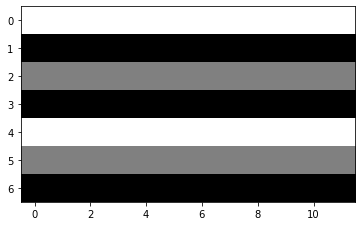

In [5]:
mp = [10,10,10,10,10,10,10,10,10,10,10,10]
mp2 = [0,0,0,0,0,0,0,0,0,0,0,0]
mp3 = [5,5,5,5,5,5,5,5,5,5,5,5]

mapa = []
mapa.append(mp)
mapa.append(mp2)
mapa.append(mp3)
mapa.append(mp2)
mapa.append(mp)
mapa.append(mp3)
mapa.append(mp2)

mostrarImagem(mapa)

Maravilha então agora, vou tentar avançar em nosso desafio. 

Agora eu gostaria de:
- criar uma função que cria uma nova imagem, retorna essa imagem.
- criar uma função que escreve um único ponto dentro da imagem criada.

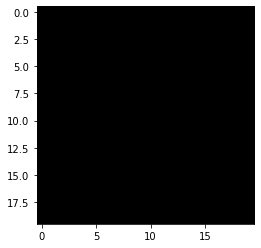

In [6]:
def criarImagem(altura, largura, pontosDeCinza):
    vetLargura = []
    for x in range(largura):
        vetLargura.append(0)
    img = []
    for y in range(altura):
        img.append(vetLargura)
    return img

## testa criando uma imagem 50x50
imagem = criarImagem(20,20,15)
mostrarImagem(imagem)

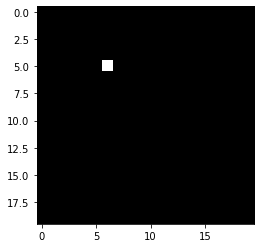

In [9]:
import numpy as np

def escrevePonto(imagem,x,y,pontosDeCinza):
    img = np.array(imagem)
    img[y,x] = pontosDeCinza
    return img

imagem = escrevePonto(imagem,6,5,15)
mostrarImagem(imagem)

Legal, agora conseguimos fazer até mesmo uma breve animação do nosso pontinho descendo: 

Maravilha, agora que temos alguns movimentos básicos, e se nós fizessemos esse desenho:

Para quem não viu ainda, esse tipo de figura é bastante interessante e intrigante ao mesmo tempo, chamadas de "fractais". Essas figuras são bonitas e repetem sussessivamente uma sequência infinitamente. 

Um exemplo clássico é o fracal de Mendelbrot:

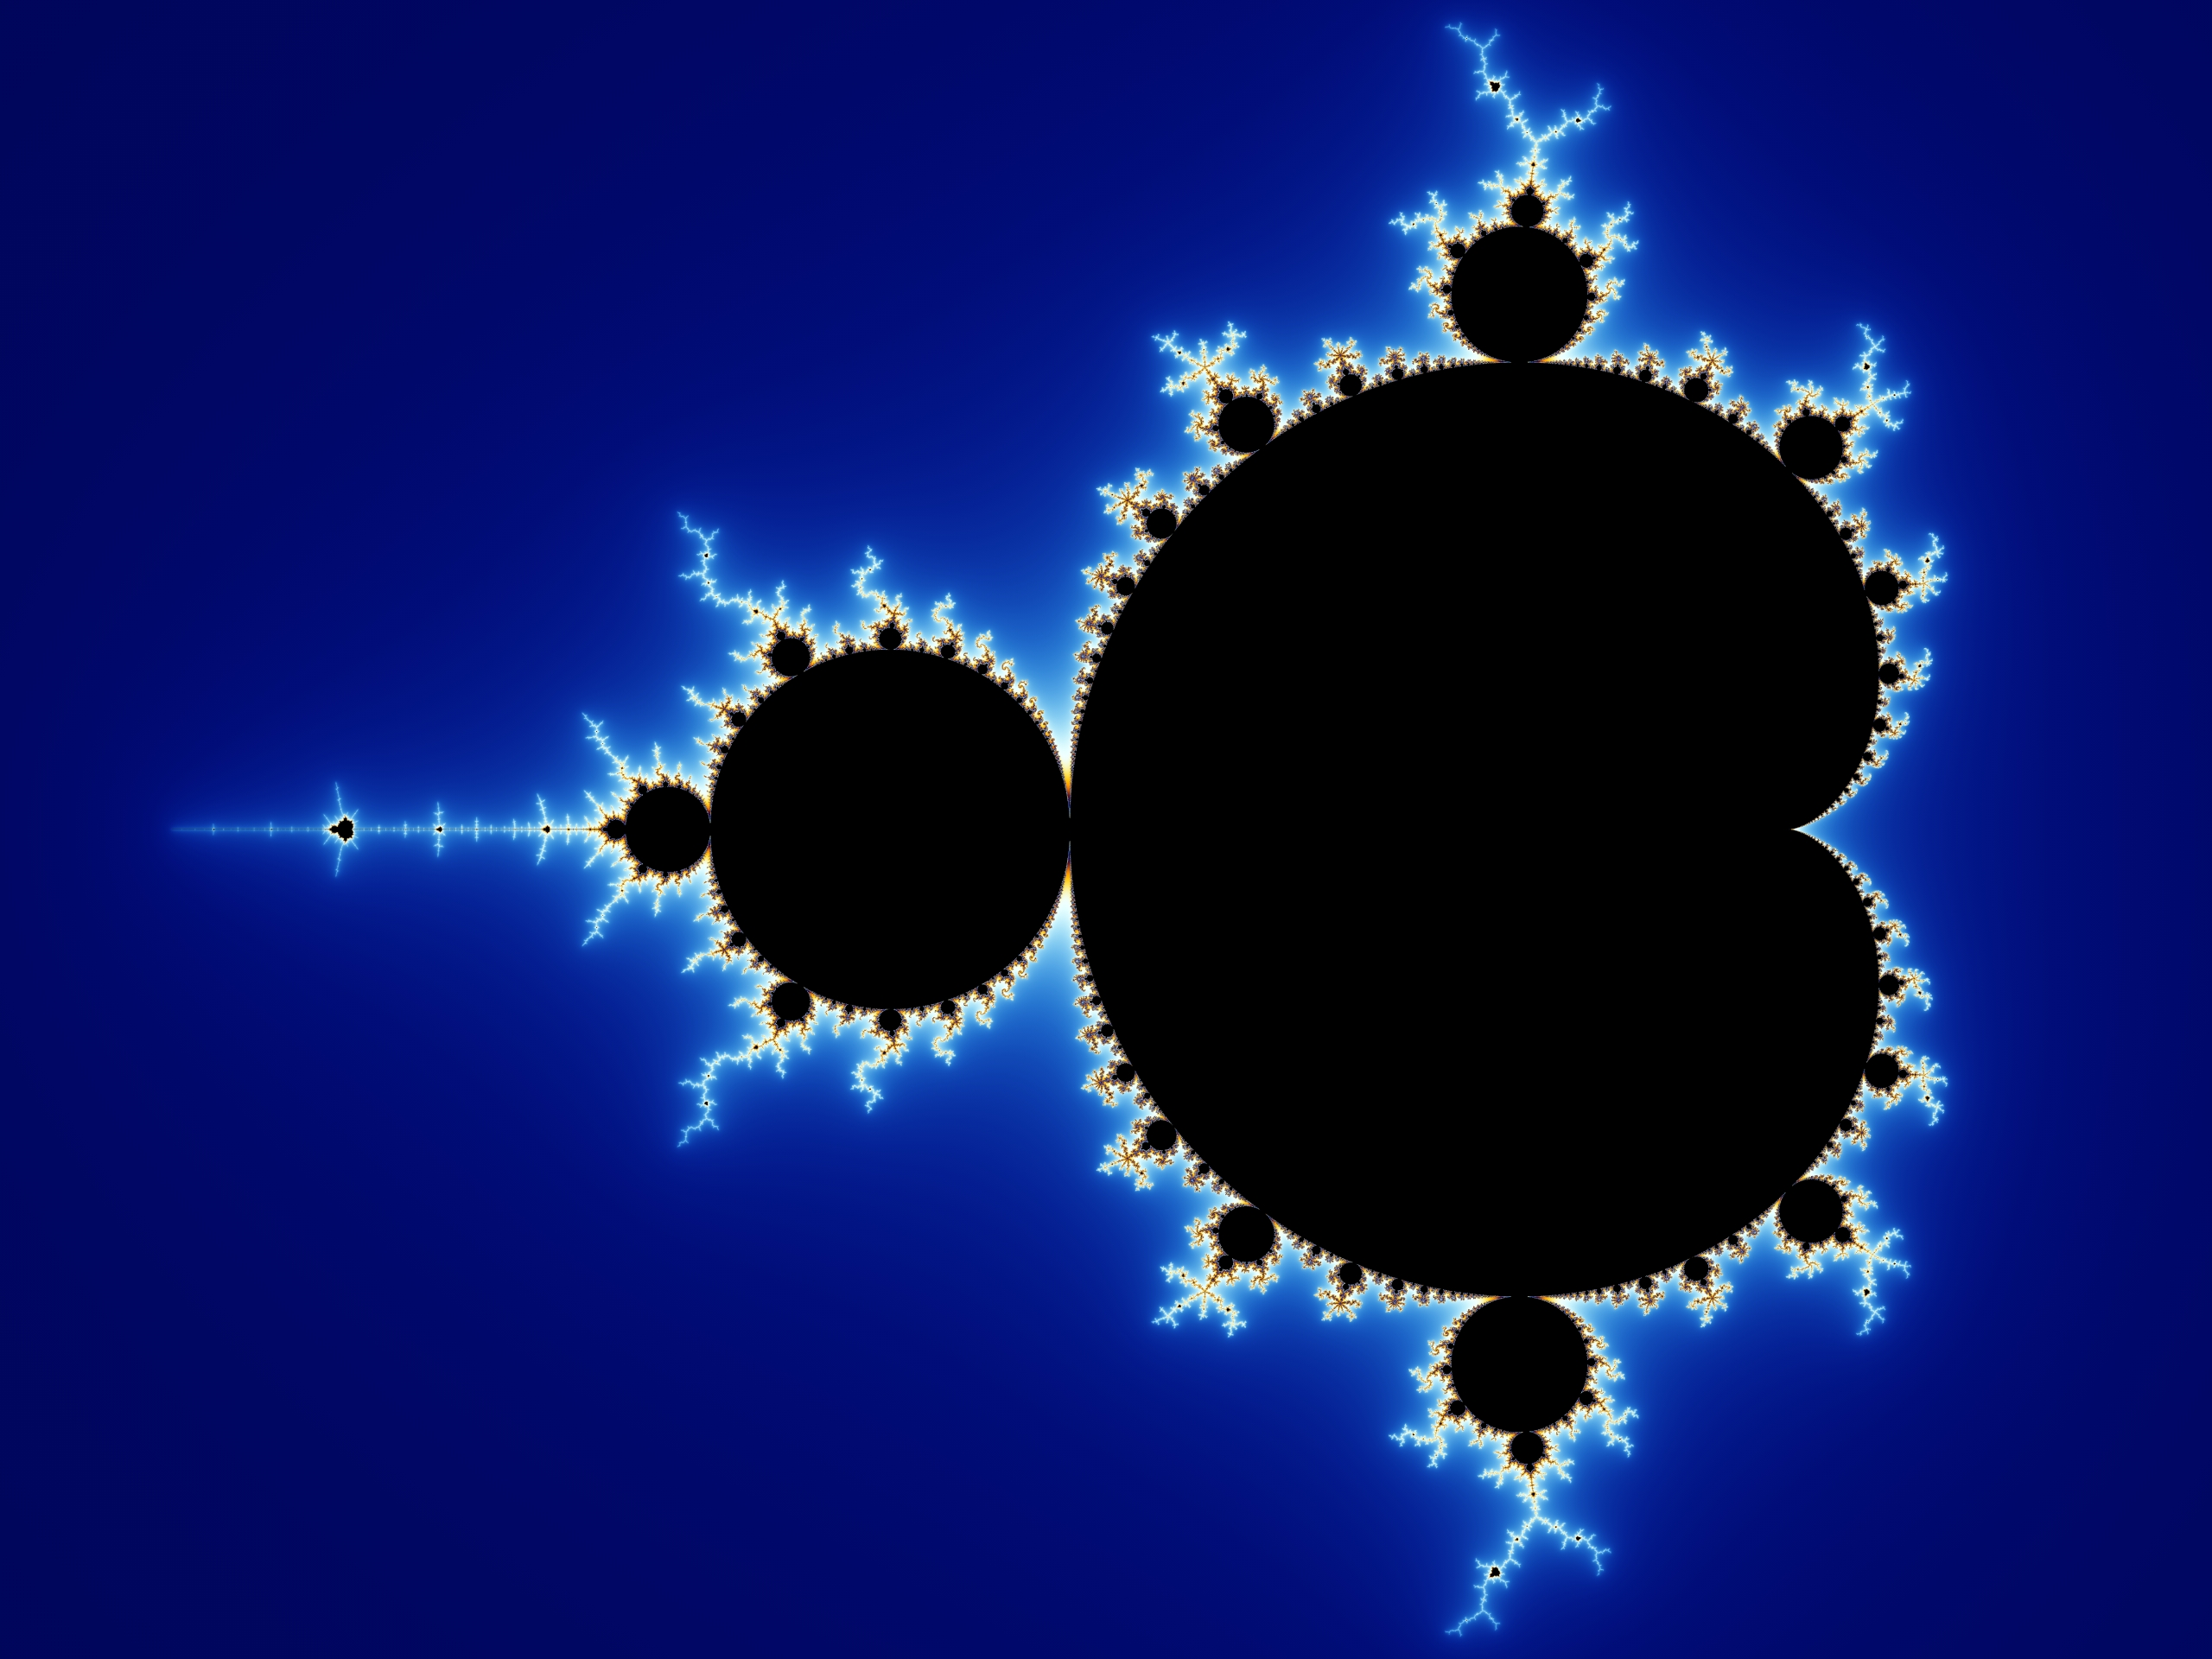


Para desenhar o fractal de mendelbrot precisamos entender a matemática por trás desse conjunto. Ele é definido como:
> Conjunto de pontos c no plano complexo para o qual a sucessão definida recursivamente:

$$ 
Z_{0} = 0
$$ 
$$
Z_{n} + 1 = Z^{2}_{n} + c
$$

não tende ao infinito.

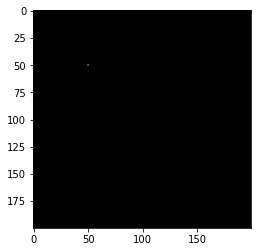

In [10]:
imagem = criarImagem(200,200,15)
imagem = escrevePonto(imagem,50,50,15)
mostrarImagem(imagem)

In [11]:
## função auxiliar:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

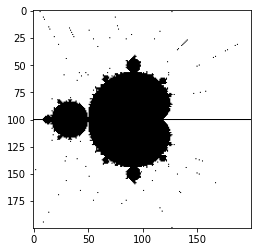

In [37]:
## vamos definir aqui um valor de width e height
width = 200
height = 200

imagem = criarImagem(width,height,15)

maxiterations = 100;

for x in range (width):
    for y in range(height):
        #print(y/50*100, "%")
        a = translate(x,0, width,-1.5,1.5)
        b = translate(y,0, height,-1.5,1.5)
    
        
        ca = a
        cb = b
        
        n = 0 
        while (n < maxiterations):
            aa = a* a -b * b
            bb = 2* a * b
            a = aa +ca
            b = bb + cb
            if (a * (a + b) * b > 16):
                break
            n += 1
        
        bright = 15
        
        if n == maxiterations:
            bright = 0
        imagem = escrevePonto(imagem,x,y,bright)   
            
            

mostrarImagem(imagem)
        